# Time Series Exploration Exercises

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

import prepare
import acquire

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)

### Store Data

In [2]:
# read in and prepare the store data:
df = acquire.wrangle_store_data()
df = prepare.prep_store_data(df)

In [3]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,quantity,store_address,store_zipcode,store_city,store_state,month,dow,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,01-Jan,2-Tue,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,01-Jan,2-Tue,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,01-Jan,2-Tue,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,01-Jan,2-Tue,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,01-Jan,2-Tue,25.16


In [4]:
# look at max and min dates
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [5]:
# Train, validate, test split:

train = df[:'2015']
validate = df['2016']
test = df['2017']

<AxesSubplot:xlabel='sale_date'>

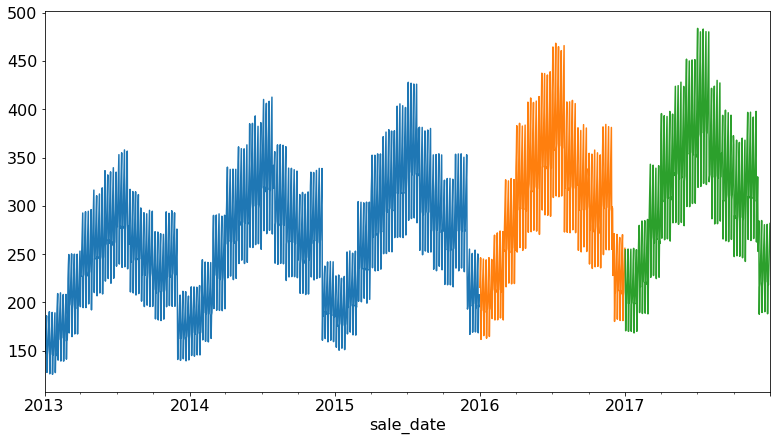

In [6]:
# Visualize the split data:

train.resample('D').sales_total.mean().plot()
validate.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

In [7]:
# y is the resampled daily data:

y = train.resample('D').sales_total.mean()
y.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

Text(0, 0.5, 'Difference in sales from one day to the next')

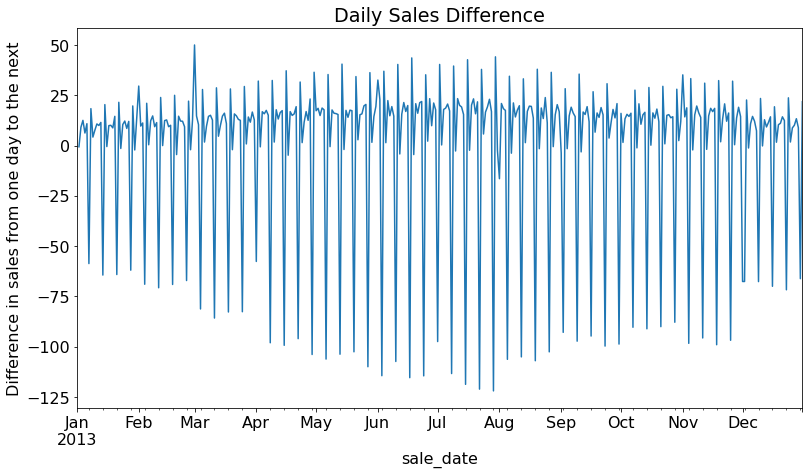

In [8]:
# Plot the daily difference. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

y.diff()['2013'].plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, 'Difference in sales from one day to the next')

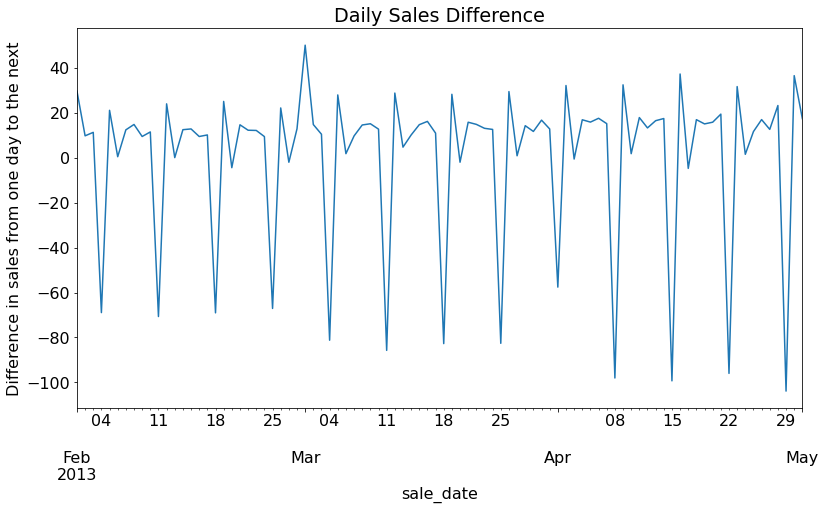

In [9]:
# A closer look at those spikes
y.diff()['2013-02-01':'2013-05-01'].plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

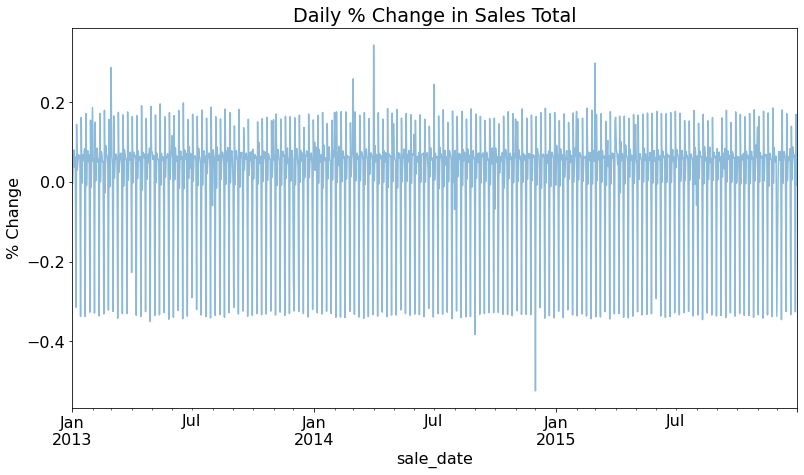

In [10]:
# Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

Let's take a look at this week over week and month over month as well.

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

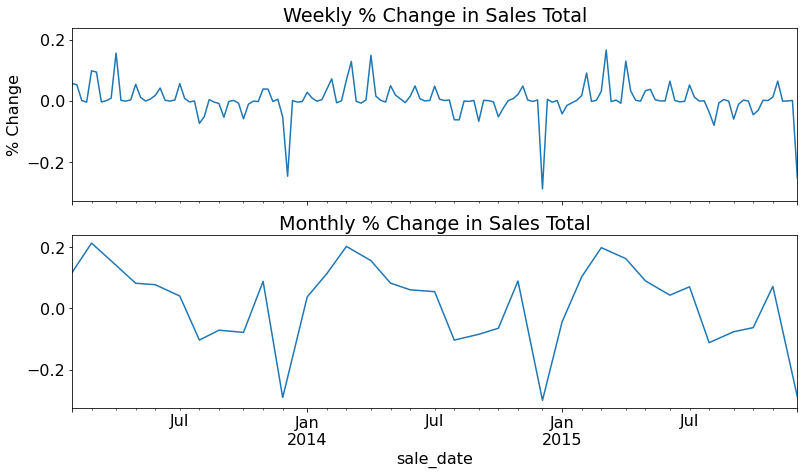

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())

In [12]:
y.resample('W').mean()

sale_date
2013-01-06    163.589167
2013-01-13    159.981203
2013-01-20    157.946720
2013-01-27    158.545383
2013-02-03    167.585014
                 ...    
2015-12-06    221.695289
2015-12-13    211.503734
2015-12-20    212.435217
2015-12-27    211.800551
2016-01-03    192.321360
Freq: W-SUN, Name: sales_total, Length: 157, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

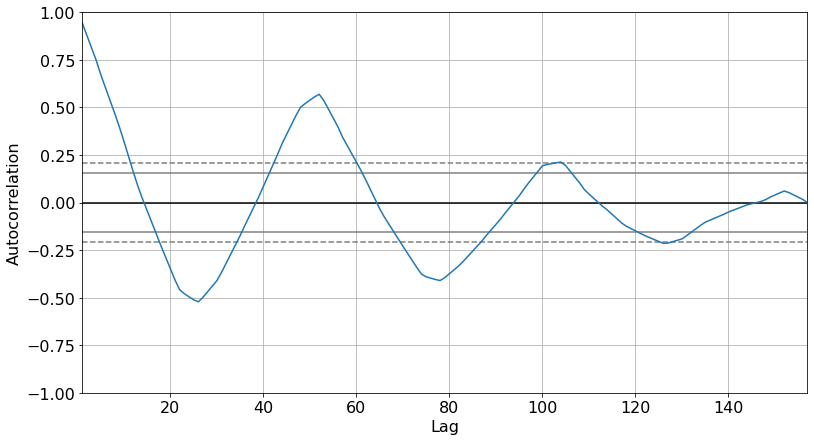

In [13]:
# Autocorrelation after weekly resampling:

pd.plotting.autocorrelation_plot(y.resample('W').mean())

We can see the yearly seasonality in the autocorrelation plot above

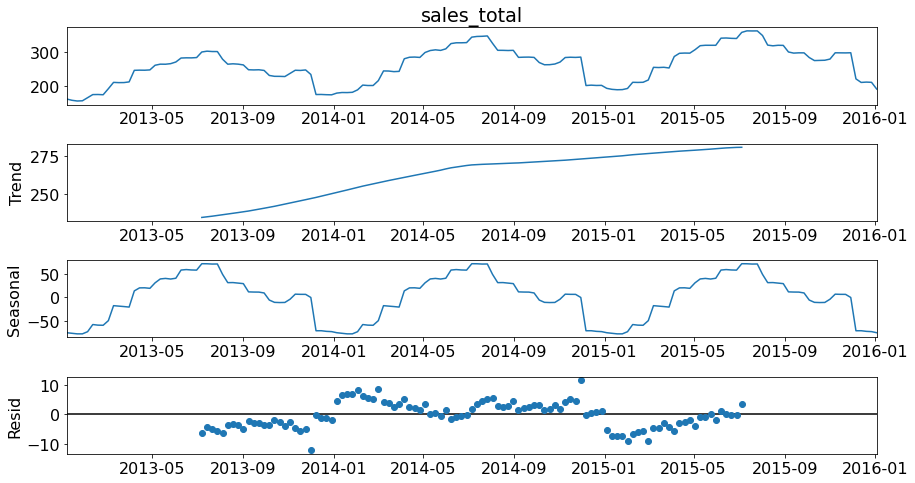

In [14]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
plt.show()

****
#### Using your OPS data you prepped in lesson 2 exercises:

In [15]:
power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
power = prepare.prep_opsd_data(power)

In [16]:
power.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006


In [17]:
# How many nulls in the data?
power.isnull().sum()

consumption    0
wind           0
solar          0
wind_solar     0
month          0
year           0
dtype: int64

In [18]:
power.index.min(), power.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [19]:
# split the data. I'll give two years for the validate and test set:
    
train = power[:'2013']
train.head()


,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006


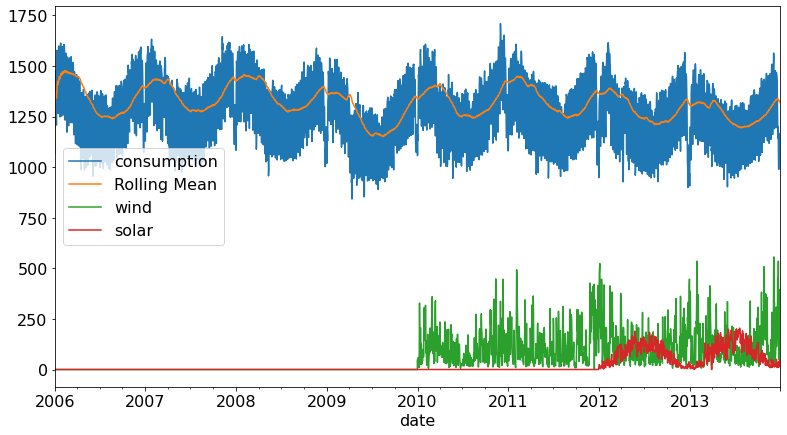

In [20]:
# plot the consumption, wind and solar data

train.consumption.plot(label="consumption")
plt.plot(train['consumption'].rolling('90D').mean(), label="Rolling Mean")
train.wind.plot()
train.solar.plot()
plt.legend()

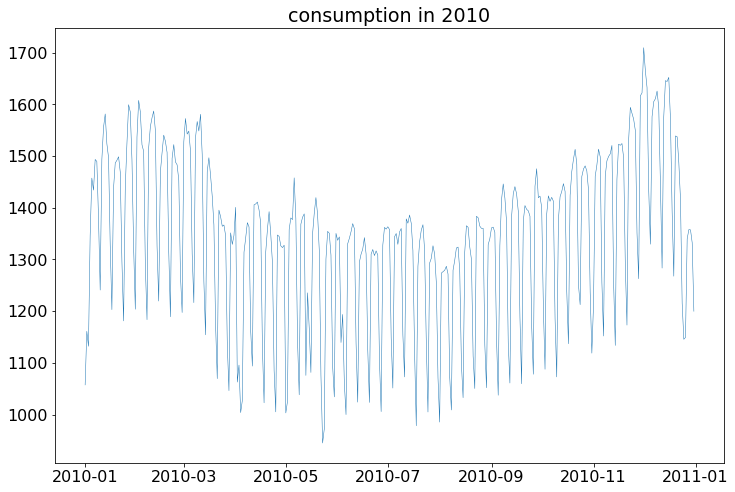

In [21]:
# lets look at consumption in a single year and see if we see any pattern
plt.figure(figsize=(12,8))
plt.plot(train.loc['2010-01':'2010-12']['consumption'], linewidth = 0.5)
plt.title("consumption in 2010")
plt.show()

There is a weekly pattern (i.e. within one week) and pattern within weeks of a month

<AxesSubplot:xlabel='date'>

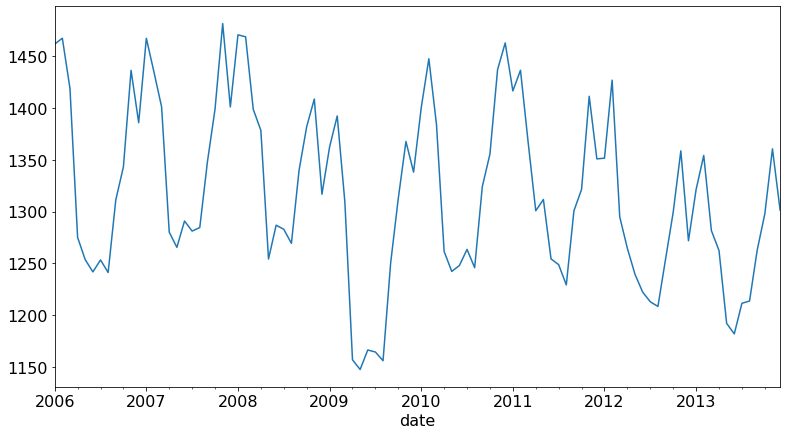

In [22]:
# resample monthly and plot

train.consumption.resample('M').mean().plot()

(1100.0, 1400.0)

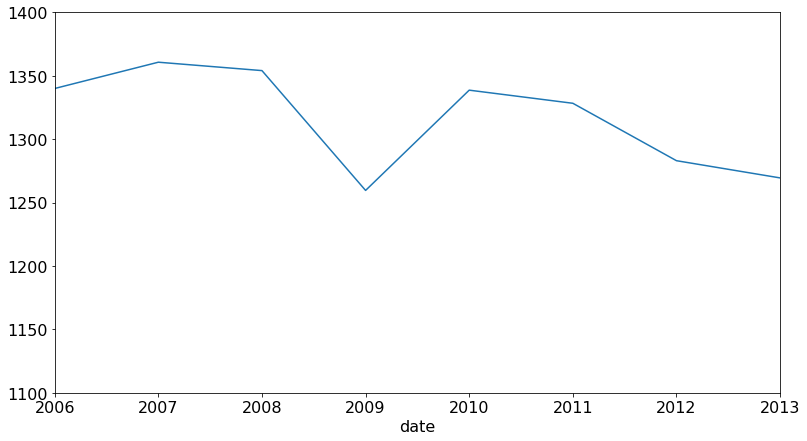

In [23]:
# resample data on yearly basis and plot
train.consumption.resample('Y').mean().plot()
plt.ylim(1100,1400)

In [24]:
# lets fill all NaNs with zero
train = train.fillna(0)

In [25]:
# make a new datafrsame sources
sources = train[['consumption', 'wind', 'solar']]

# make a new column called conventional: Consumption - Wind - Solar
sources['conventional'] = sources.consumption - sources.wind - sources.solar

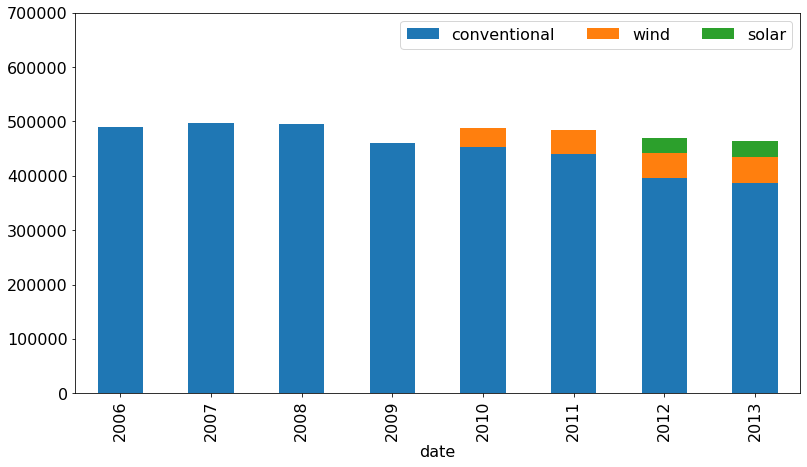

In [26]:
# lets plot the three power sources as stacked bar chart:

ax = sources[['conventional', 'wind', 'solar']].resample('Y').sum().plot.bar(stacked = True)
ax.set_ylim(0, 700000)
ax.legend(ncol = 3)

labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

#### Group the electricity consumption time series by month of year, to explore annual seasonality.

In [27]:
train['month'] = train.index.month
train['weekday'] = train.index.day_name()

<AxesSubplot:xlabel='month', ylabel='consumption'>

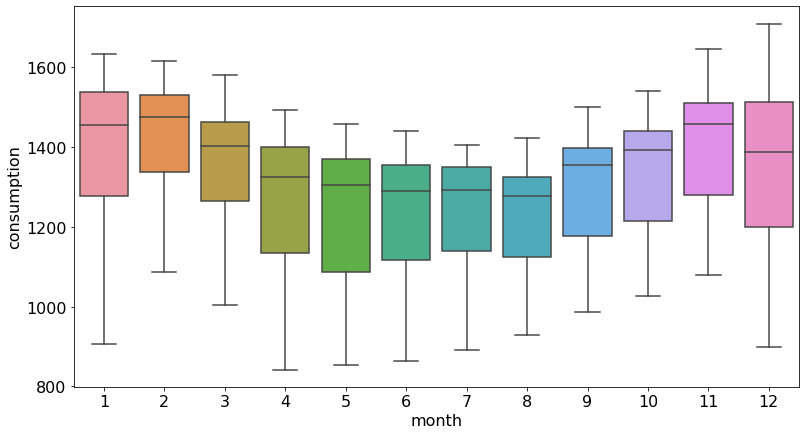

In [28]:
# Energy consumption by month
sns.boxplot(data = train, x = 'month', y = 'consumption')


Consumption drops in summer months

<AxesSubplot:xlabel='weekday', ylabel='consumption'>

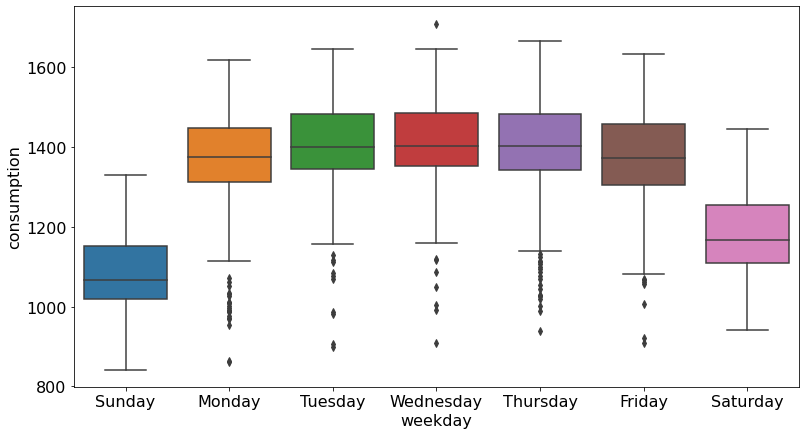

In [29]:
# Energy consumption by weekday
sns.boxplot(data = train, x = 'weekday', y = 'consumption')

Seems like consumption drops on weekend

#### Subseasonal Plot

In [30]:
y = train.consumption
table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack()

table.head()

date,01-Jan,02-Feb,03-Mar,04-Apr,05-May,06-Jun,07-Jul,08-Aug,09-Sep,10-Oct,11-Nov,12-Dec
date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581


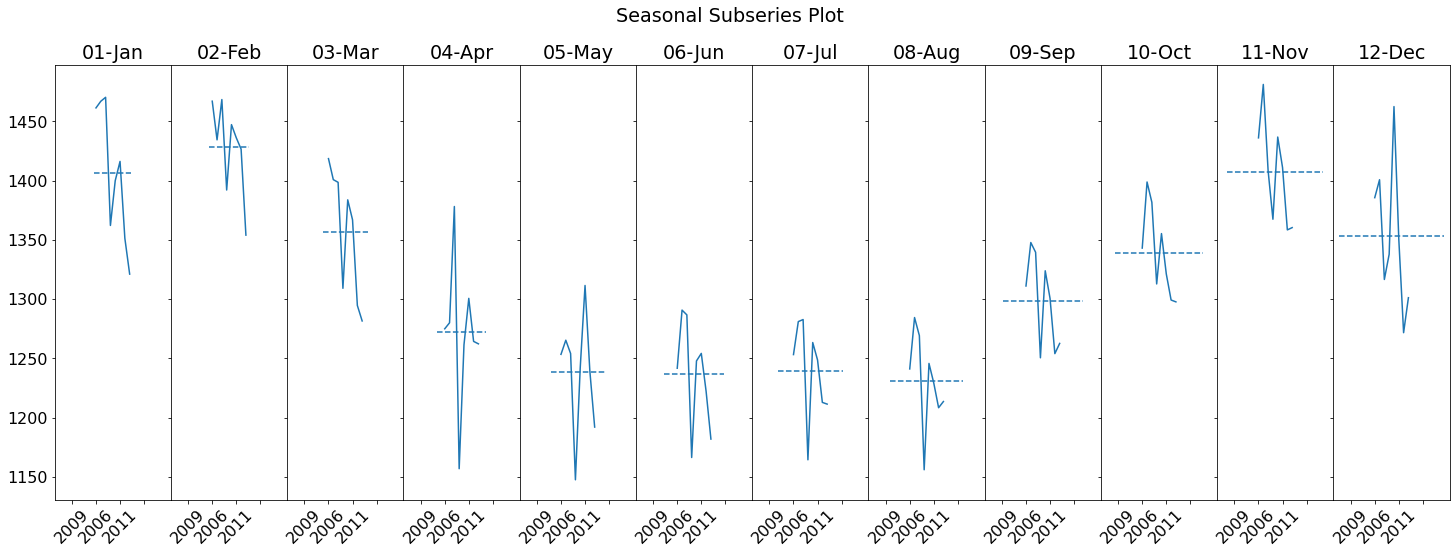

In [31]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(25,8))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=45)

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

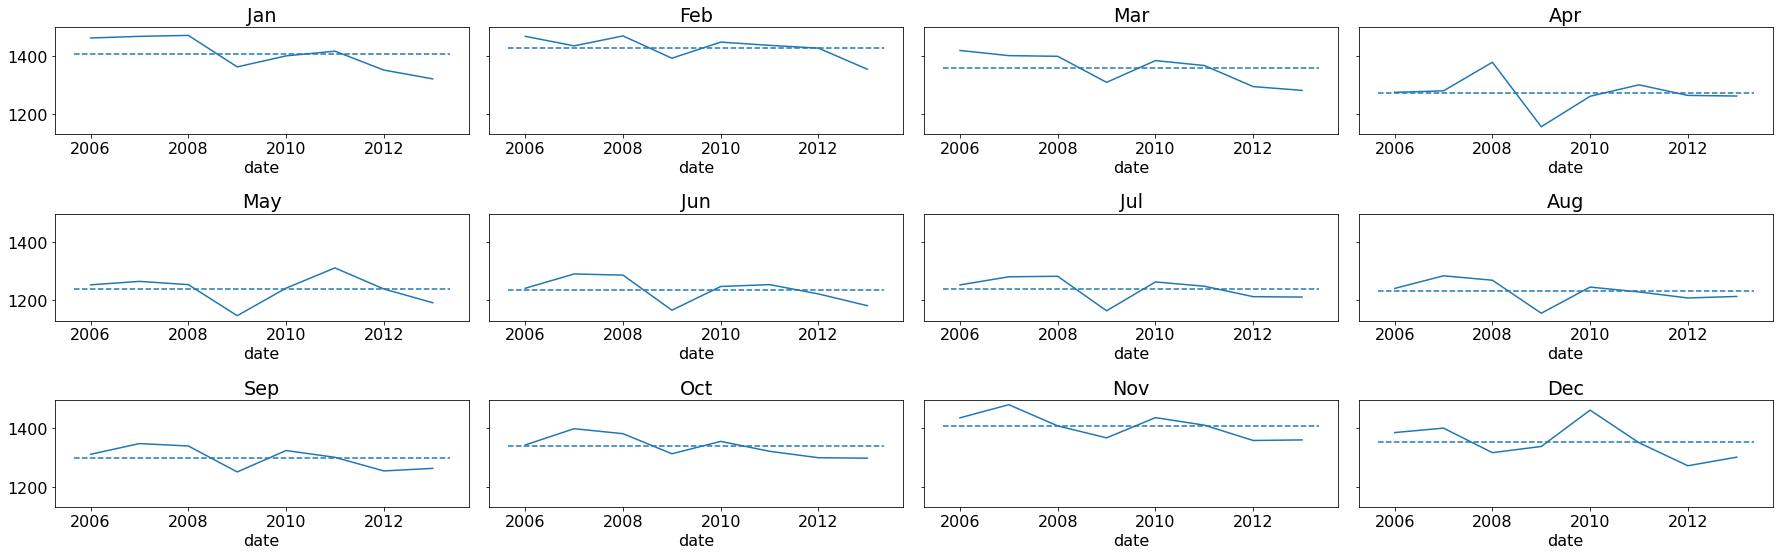

In [32]:
fig, axs = plt.subplots(3, 4, sharex=False, sharey=True, figsize=(25,8))

for ax, (month, subset) in zip(axs.ravel(), table.iteritems()):
    subset.plot(ax=ax, title=month[3:])
    ax.hlines(subset.mean(), *ax.get_xlim(), ls = '--')
fig.subplots_adjust(wspace=0)
plt.tight_layout()

[Text(0.5, 1.0, 'Wind production pattern')]

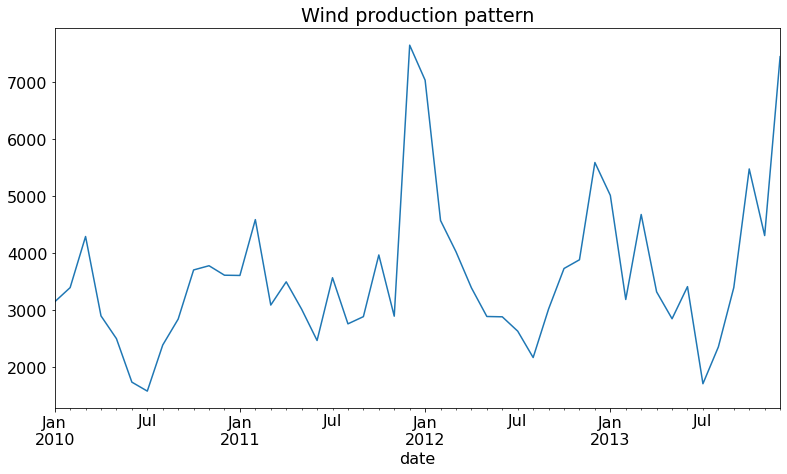

In [33]:
# How does the wind production/consumption vary within a year and also year to year?

ax = train['2010':].wind.resample('M').sum().plot()
ax.set(title = 'Wind production pattern')

Wind production drops in summer months

[Text(0.5, 1.0, 'Solar production pattern')]

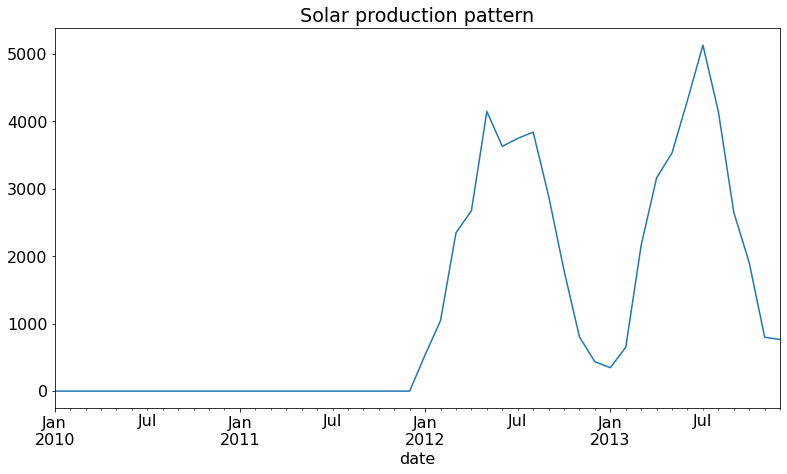

In [34]:
# How does the solar production/consumption vary within a year and also year to year?


ax = train['2010':].solar.resample('M').sum().plot()
ax.set(title = 'Solar production pattern')

Solar production peaks in summer

In [35]:
# bring in the GDP growth rate data

growth_rate = {2006:3.815, 2007:2.984, 2008:0.962, 2009:-5.697, 2010:4.179, 2011:3.924, 2012:0.42, 2013:0.428, 2014:2.226 , 2015:1.74 , 2016:2.23 , 2017:2.465 }

In [36]:
# convert dict to dataframe
growth_rate = pd.DataFrame.from_dict(growth_rate, orient='index', columns = ['growth_rate'])
growth_rate.head()

,growth_rate
2006,3.815
2007,2.984
2008,0.962
2009,-5.697
2010,4.179


In [37]:
# set index as datetimeindex
growth_rate.index = pd.to_datetime(growth_rate.index, format = '%Y' )

In [38]:
# check the dataframe hear
growth_rate.head()

,growth_rate
2006-01-01,3.815
2007-01-01,2.984
2008-01-01,0.962
2009-01-01,-5.697
2010-01-01,4.179


Text(0, 0.5, 'Growth Rate')

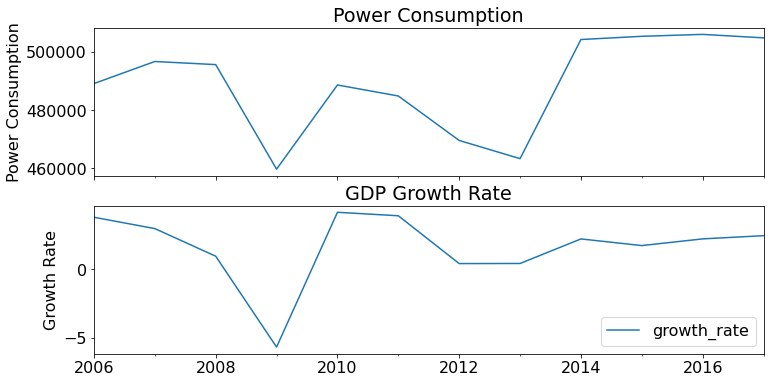

In [39]:
# compare power consumption and GDP growth rate:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 9))

ax = power.consumption.resample('Y').sum().plot(figsize = (12,6), ax = ax1)
ax1.set(title='Power Consumption')
ax1.set_ylabel('Power Consumption')

growth_rate.plot(ax =ax2)
ax2.set(title='GDP Growth Rate')
ax2.set_ylabel('Growth Rate')

#### Plot a time series decomposition. Takeaways?

In [40]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').consumption.mean(), model='additive')

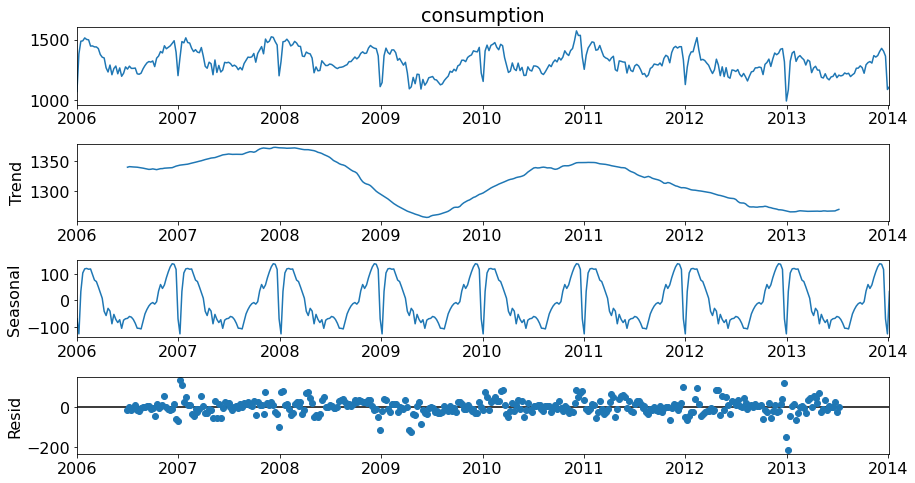

In [41]:
decomposition.plot()
plt.show()

There is a annual seasonality. The energy consumption drops during December

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

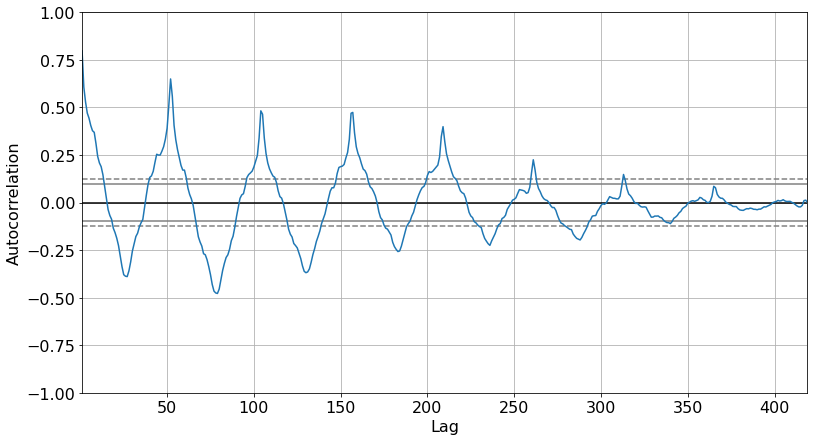

In [42]:
# autocorrelation plot 
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())


We can see then annual pattern in the autocorrelation plot above

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

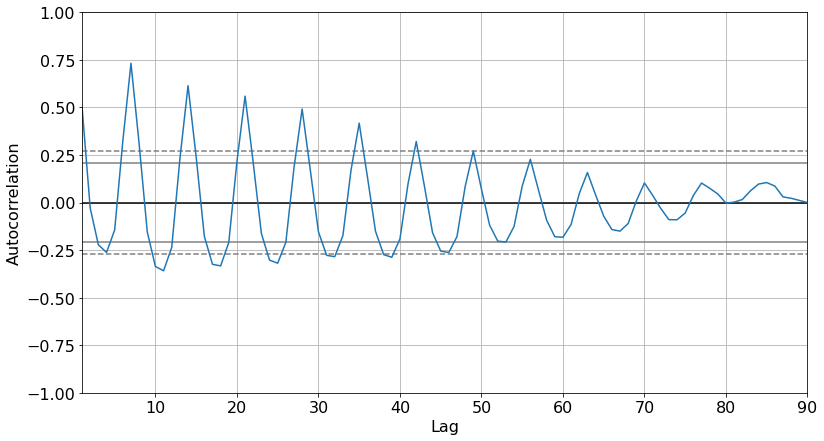

In [43]:
# Is there a weekly seasonality in this data?
pd.plotting.autocorrelation_plot(train.consumption['2010-01': '2010-03'])

Yes!